In [1]:
from qiskit import IBMQ, Aer, assemble, transpile, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import array_to_latex
from qiskit.tools.monitor import job_monitor 
from qiskit.providers.ibmq import least_busy

import datetime
from datetime import time
from datetime import datetime
import pytz
from pytz import timezone

import numpy as np
from numpy import sum
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
matrixdata = {}

#time loop 
def collectdata(matrixdata, listofhours, listofminutes):
    t = datetime.now(pytz.timezone('US/Central'))
    print(t)  
    for val in listofhours:
        for val2 in listofminutes:
            while True:
                if t.hour== val and t.minute == val2: 
                    bigmatrix= []
                    #copied from the qiskit document in slack 
                    for state in ['000','001','010','011','100','101','110','111']:
                        qc = QuantumCircuit(3,3)
                        if state[0]=='1':
                            qc.x(2)
                        if state[1]=='1':
                            qc.x(1)
                        if state[2]=='1':
                            qc.x(0)
                        qc.measure([0, 1, 2],[0,1,2])

                        #copied from summer school code
                        IBMQ.load_account()
                        provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
                        backend = provider.get_backend('ibm_perth')
                        print("backend: ", backend)

                        shots = 5000
                        transpiled_qc = transpile(qc, backend=backend)
                        job = backend.run(transpiled_qc, shots=shots)
                        job_monitor(job, interval=2)
                        results = job.result().get_counts()
                        print ("results:", results)

                        # in this next part I'm just trying to say that if there's less than 4 items (implying that one of the states showed up zero times), add a zero at the corresponding spot in the list
                        # i'm sure there's a more efficient way to do this 
                        keys= results.keys()
                        values = results.values()
                        numoftimes= []
                        state= []
                        for value in values:
                            numoftimes.append(value/5000)
                        for key in keys:
                            state.append(key)

                        while len(state) < 8:
                            state.append(0)

                        if state != ['000','001','010','011','100','101','110','111']:
                            if state[0] != '000':
                                state.insert(0,'000')
                                numoftimes.insert(0,0)
                            if state[1] != '001':
                                state.insert(1,'001')
                                numoftimes.insert(1,0)
                            if state[2] != '010':
                                state.insert(2,'010')
                                numoftimes.insert(2,0)
                            if state[3] != '011':
                                state.insert(3,'011')
                                numoftimes.insert(3,0)
                            if state[4] != '100':
                                state.insert(4,'100')
                                numoftimes.insert(4,0)
                            if state[5] != '101':
                                state.insert(5,'101')
                                numoftimes.insert(5,0)
                            if state[6] != '110':
                                state.insert(6,'110')
                                numoftimes.insert(6,0)
                            if state[7] != '111':
                                state.insert(7,'111')
                                numoftimes.insert(7,0)

                        #print(numoftimes)
                        bigmatrix.append(numoftimes)

                    #print("big matrix:", bigmatrix)
                    matrixdata[str(datetime.now(pytz.timezone('US/Central')))]= bigmatrix
                    break
                else:
                    t = datetime.now(pytz.timezone('US/Central'))
    return matrixdata


In [21]:
collectdata(matrixdata, [10,11,12,13,14,15,16,17,18,19,21,22], [5])

2022-01-17 14:54:36.010076-06:00


ibmqfactory.load_account:WARNING:2022-01-17 21:05:00,258: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-17 21:07:12,197: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4696, '001': 68, '010': 83, '011': 1, '100': 150, '110': 2}
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 217, '001': 4597, '010': 7, '011': 57, '100': 7, '101': 115}


ibmqfactory.load_account:WARNING:2022-01-17 21:09:22,183: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 99, '010': 4655, '011': 64, '100': 6, '110': 175, '111': 1}


ibmqfactory.load_account:WARNING:2022-01-17 21:11:32,898: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-17 21:13:43,490: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 8, '001': 93, '010': 262, '011': 4480, '101': 6, '110': 5, '111': 146}
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-17 21:15:42,726: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 127, '001': 2, '010': 2, '100': 4699, '101': 89, '110': 80, '111': 1}
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-17 21:17:52,274: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 6, '001': 137, '010': 1, '011': 5, '100': 280, '101': 4478, '110': 9, '111': 84}
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 1, '010': 146, '011': 1, '100': 97, '101': 2, '110': 4660, '111': 93}


ibmqfactory.load_account:WARNING:2022-01-17 21:20:02,282: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 5, '010': 10, '011': 145, '100': 8, '101': 102, '110': 315, '111': 4415}


{'2022-01-17 10:45:31.943399-06:00': [[0.9502,
   0.017,
   0.0146,
   0.0004,
   0.0172,
   0.0002,
   0.0004,
   0],
  [0.0474, 0.9218, 0.0006, 0.0128, 0.0002, 0.0168, 0.0002, 0.0002],
  [0.0198, 0, 0.9442, 0.0128, 0.0002, 0, 0.0226, 0.0004],
  [0.0032, 0.054, 0.044, 0.878, 0, 0.0012, 0.001, 0.0186],
  [0.0158, 0, 0.0006, 0, 0.9558, 0.014, 0.0136, 0.0002],
  [0.0012, 0.0144, 0.0002, 0.0004, 0.0408, 0.9238, 0.0012, 0.018],
  [0.001, 0, 0.0144, 0.0002, 0.0244, 0, 0.9454, 0.0146],
  [0, 0.0004, 0.0002, 0.0124, 0.0012, 0.02, 0.0454, 0.9204]],
 '2022-01-17 11:17:42.035751-06:00': [[0.9478,
   0.0146,
   0.0162,
   0,
   0.0208,
   0.0006,
   0,
   0],
  [0.0502, 0.9098, 0.0008, 0.0154, 0.0008, 0.0228, 0, 0.0002],
  [0.0196, 0, 0.949, 0.013, 0.0002, 0, 0.0182, 0],
  [0.001, 0.0188, 0.0446, 0.916, 0, 0.0002, 0.0006, 0.0188],
  [0.0146, 0.0002, 0.0006, 0, 0.9574, 0.0108, 0.0164, 0],
  [0.0004, 0.0168, 0, 0.0002, 0.0394, 0.928, 0.0006, 0.0146],
  [0.0008, 0, 0.0162, 0, 0.02, 0.0006, 0.949, 0.

In [3]:
matrixdata = {'2022-01-17 10:45:31.943399-06:00': [[0.9502, 0.017, 0.0146, 0.0004, 0.0172, 0.0002, 0.0004, 0], [0.0474, 0.9218, 0.0006, 0.0128, 0.0002, 0.0168, 0.0002, 0.0002], [0.0198, 0, 0.9442, 0.0128, 0.0002, 0, 0.0226, 0.0004], [0.0032, 0.054, 0.044, 0.878, 0, 0.0012, 0.001, 0.0186], [0.0158, 0, 0.0006, 0, 0.9558, 0.014, 0.0136, 0.0002], [0.0012, 0.0144, 0.0002, 0.0004, 0.0408, 0.9238, 0.0012, 0.018], [0.001, 0, 0.0144, 0.0002, 0.0244, 0, 0.9454, 0.0146], [0, 0.0004, 0.0002, 0.0124, 0.0012, 0.02, 0.0454, 0.9204]], '2022-01-17 11:17:42.035751-06:00': [[0.9478, 0.0146, 0.0162, 0, 0.0208, 0.0006, 0, 0], [0.0502, 0.9098, 0.0008, 0.0154, 0.0008, 0.0228, 0, 0.0002], [0.0196, 0, 0.949, 0.013, 0.0002, 0, 0.0182, 0], [0.001, 0.0188, 0.0446, 0.916, 0, 0.0002, 0.0006, 0.0188], [0.0146, 0.0002, 0.0006, 0, 0.9574, 0.0108, 0.0164, 0], [0.0004, 0.0168, 0, 0.0002, 0.0394, 0.928, 0.0006, 0.0146], [0.0008, 0, 0.0162, 0, 0.02, 0.0006, 0.949, 0.0134], [0, 0, 0.0006, 0.0128, 0.0006, 0.0184, 0.0432, 0.9244]], '2022-01-17 12:53:21.137402-06:00': [[0.939, 0.0152, 0.0162, 0.0002, 0.0286, 0.0004, 0.0004, 0], [0.0422, 0.8986, 0.0014, 0.0148, 0.003, 0.039, 0, 0.001], [0.0256, 0, 0.914, 0.0154, 0.001, 0, 0.0436, 0.0004], [0.0004, 0.0208, 0.0428, 0.9048, 0, 0.0004, 0.0012, 0.0296], [0.0244, 0.0006, 0, 0, 0.9456, 0.0128, 0.0166, 0], [0.0008, 0.025, 0, 0.0008, 0.0454, 0.9142, 0.0006, 0.0132], [0.0008, 0, 0.0166, 0.0002, 0.0224, 0, 0.9466, 0.0134], [0, 0.0012, 0.0014, 0.0168, 0.0004, 0.0166, 0.039, 0.9246]], '2022-01-17 13:18:52.238003-06:00': [[0.9436, 0.0144, 0.02, 0.0002, 0.0216, 0.0002, 0, 0], [0.0416, 0.9094, 0.0004, 0.0192, 0.0014, 0.0272, 0, 0.0008], [0.0228, 0.0002, 0.9386, 0.0116, 0.0006, 0, 0.0262, 0], [0.0012, 0.0186, 0.0444, 0.9154, 0, 0.0008, 0.0012, 0.0184], [0.0176, 0.0002, 0, 0, 0.953, 0.0122, 0.0168, 0.0002], [0.0002, 0.017, 0, 0.0002, 0.0428, 0.9252, 0.0006, 0.014], [0.0006, 0, 0.013, 0, 0.0294, 0.0008, 0.9396, 0.0166], [0, 0.0006, 0.001, 0.0178, 0.0014, 0.0292, 0.0418, 0.9082]], '2022-01-17 14:08:51.748124-06:00': [[0.9384, 0.0156, 0.0148, 0.0002, 0.0302, 0.0002, 0.0006, 0], [0.0426, 0.911, 0.0008, 0.0126, 0.0012, 0.0312, 0, 0.0006], [0.0212, 0, 0.9284, 0.0142, 0.0008, 0, 0.0348, 0.0006], [0.0012, 0.0184, 0.0406, 0.9104, 0, 0.001, 0.0006, 0.0278], [0.015, 0.0004, 0, 0, 0.9548, 0.012, 0.0176, 0.0002], [0.001, 0.0168, 0, 0.0002, 0.0398, 0.9278, 0.0006, 0.0138], [0.0012, 0, 0.0176, 0.0002, 0.0172, 0.0006, 0.9492, 0.014], [0, 0.0006, 0.0006, 0.016, 0.0004, 0.0196, 0.045, 0.9178]], '2022-01-17 15:22:02.319388-06:00': [[0.9392, 0.0136, 0.0166, 0.0002, 0.03, 0, 0.0004, 0], [0.0434, 0.9194, 0.0014, 0.0114, 0.0014, 0.023, 0, 0], [0.0198, 0, 0.931, 0.0128, 0.0012, 0, 0.035, 0.0002], [0.0016, 0.0186, 0.0524, 0.896, 0, 0.0012, 0.001, 0.0292], [0.0254, 0.0004, 0.0004, 0, 0.9398, 0.0178, 0.016, 0.0002], [0.0012, 0.0274, 0.0002, 0.001, 0.056, 0.8956, 0.0018, 0.0168], [0.0002, 0, 0.0292, 0.0002, 0.0194, 0.0004, 0.932, 0.0186], [0, 0.001, 0.002, 0.029, 0.0016, 0.0204, 0.063, 0.883]], '2022-01-17 16:10:45.882875-06:00': [[0.9508, 0.0118, 0.0168, 0.001, 0.0188, 0.0002, 0.0006, 0], [0.0416, 0.9206, 0.0012, 0.0176, 0.0006, 0.018, 0, 0.0004], [0.0216, 0.0002, 0.947, 0.0118, 0.0006, 0, 0.0186, 0.0002], [0.001, 0.0222, 0.0476, 0.9092, 0, 0.0006, 0.0018, 0.0176], [0.014, 0.0002, 0.0002, 0, 0.9536, 0.0126, 0.019, 0.0004], [0.0008, 0.0148, 0, 0.0002, 0.046, 0.9242, 0.0002, 0.0138], [0.0006, 0, 0.0142, 0.0006, 0.0262, 0.0002, 0.9456, 0.0126], [0, 0.0004, 0.0006, 0.0126, 0.0008, 0.0252, 0.0416, 0.9188]], '2022-01-17 17:10:19.260340-06:00': [[0.9528, 0.01, 0.0164, 0.0004, 0.0202, 0, 0.0002, 0], [0.0412, 0.9166, 0.0008, 0.0182, 0.0014, 0.021, 0, 0.0008], [0.0194, 0.0006, 0.9488, 0.0102, 0.0004, 0, 0.0202, 0.0004], [0.001, 0.0178, 0.0416, 0.9228, 0, 0.0008, 0.0002, 0.0158], [0.0188, 0.0002, 0.0004, 0, 0.9536, 0.0108, 0.0158, 0.0004], [0.0006, 0.0132, 0, 0.0004, 0.0394, 0.9282, 0.0002, 0.018], [0.0004, 0, 0.0166, 0.0002, 0.0322, 0.0002, 0.9408, 0.0096], [0, 0.0004, 0.0008, 0.017, 0.0012, 0.026, 0.045, 0.9096]], '2022-01-17 21:18:27.003029-06:00': [[0.9552, 0.0116, 0.0128, 0.0002, 0.0196, 0.0002, 0.0004, 0], [0.0434, 0.9216, 0.0012, 0.0136, 0.0008, 0.0192, 0, 0.0002], [0.0222, 0.0004, 0.9378, 0.0134, 0.0008, 0, 0.0252, 0.0002], [0.001, 0.0208, 0.0404, 0.9168, 0, 0.0004, 0.0008, 0.0198], [0.016, 0.0002, 0.0002, 0, 0.947, 0.0168, 0.0192, 0.0006], [0.0002, 0.0162, 0, 0.0002, 0.039, 0.9262, 0.0006, 0.0176], [0.0002, 0, 0.0146, 0.0004, 0.0208, 0, 0.9484, 0.0156], [0, 0.0002, 0.0006, 0.0156, 0.0014, 0.0194, 0.0416, 0.9212]], '2022-01-17 22:34:15.246725-06:00': [[0.9576, 0.013, 0.0144, 0, 0.0148, 0.0002, 0, 0], [0.069, 0.8888, 0.0008, 0.0174, 0.0016, 0.0218, 0, 0.0006], [0.0218, 0.0002, 0.9418, 0.0162, 0.001, 0, 0.0186, 0.0004], [0.0006, 0.018, 0.0502, 0.9112, 0, 0.0006, 0.0008, 0.0186], [0.0116, 0, 0.0002, 0, 0.9562, 0.0132, 0.0184, 0.0004], [0.0006, 0.0212, 0, 0.0002, 0.046, 0.9156, 0.0012, 0.0152], [0.0016, 0, 0.0184, 0.0002, 0.0196, 0.0002, 0.9428, 0.0172], [0, 0.0002, 0.0006, 0.0202, 0.0014, 0.0198, 0.0504, 0.9074]]}

In [4]:
listofmatrixes= []
for key, value in matrixdata.items():
    value= np.array(value)
    value= value.transpose()
    listofmatrixes.append(value)
    
array_to_latex(listofmatrixes[0])

<IPython.core.display.Latex object>

{'000': 0.9502, '001': 0.017, '010': 0.0146, '011': 0.0004, '100': 0.0172, '101': 0.0002, '110': 0.0004, '111': 0.0}


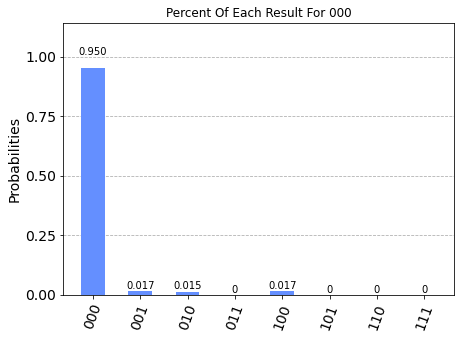

In [5]:
examplematrix=listofmatrixes[0]
examplematrix= examplematrix.transpose()

statelist = ['000','001','010','011','100','101','110','111']

zerozerozero = examplematrix[0]
zerozeroone = examplematrix[1]
zeroonezero = examplematrix[2]
zerooneone = examplematrix[3]
onezerozero = examplematrix[4]
onezeroone = examplematrix[5]
oneonezero = examplematrix[6]
oneoneone = examplematrix[7]

zerozerozerodic = dict(zip(statelist,zerozerozero))
zerozeroonedic = dict(zip(statelist, zerozeroone))
zeroonezerodic = dict(zip(statelist,zeroonezero))
zerooneonedic = dict(zip(statelist,zerooneone))
onezerozerodic = dict(zip(statelist,onezerozero))
onezeroonedic = dict(zip(statelist,onezeroone))
oneonezerodic = dict(zip(statelist,oneonezero))
oneoneonedic = dict(zip(statelist,oneoneone))

print(zerozerozerodic)

plot_histogram([zerozerozerodic], title="Percent Of Each Result For 000")

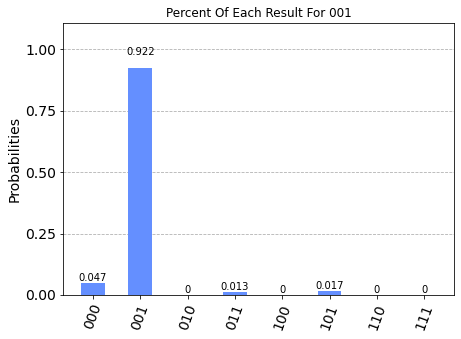

In [6]:
plot_histogram([zerozeroonedic], title="Percent Of Each Result For 001")

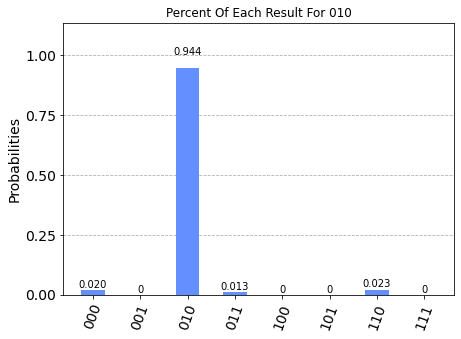

In [7]:
plot_histogram([zeroonezerodic], title="Percent Of Each Result For 010")

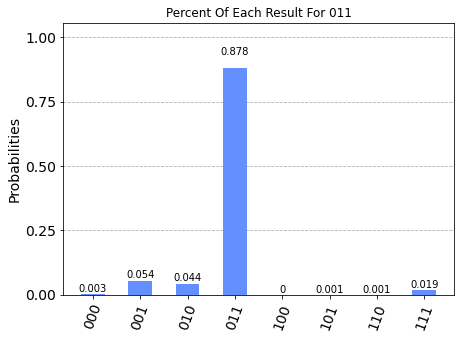

In [8]:
plot_histogram([zerooneonedic], title="Percent Of Each Result For 011")

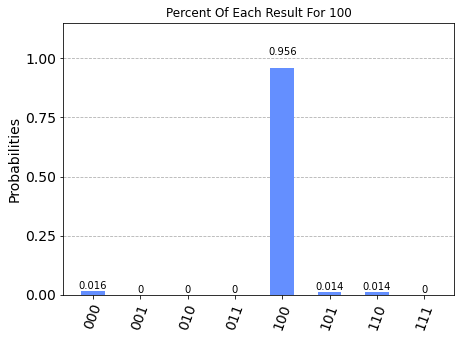

In [9]:
plot_histogram([onezerozerodic], title="Percent Of Each Result For 100")

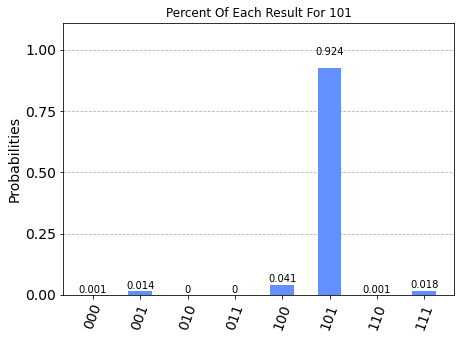

In [10]:
plot_histogram([onezeroonedic], title="Percent Of Each Result For 101")

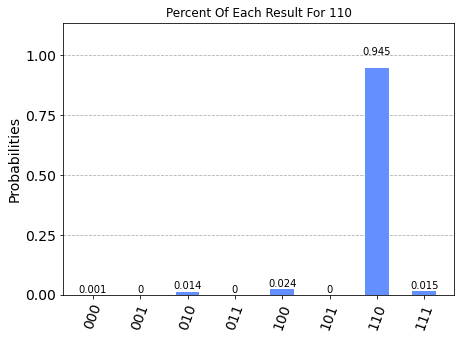

In [11]:
plot_histogram([oneonezerodic], title="Percent Of Each Result For 110")

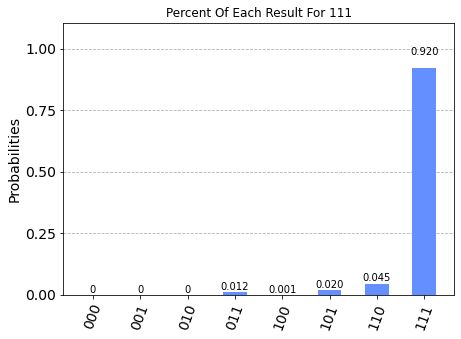

In [12]:
plot_histogram([oneoneonedic], title="Percent Of Each Result For 111")

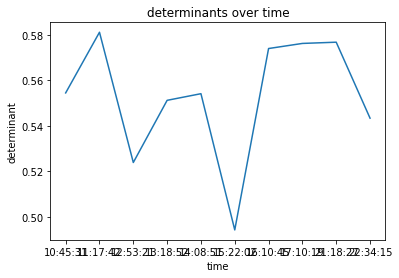

In [13]:
detlist = []
for array in listofmatrixes: 
    detlist.append(np.linalg.det(array))
    
timelist = []
for key, value in matrixdata.items():
    timeofday= key.split(' ')[1]
    smallertimeofday = timeofday.split('.')[0]
    timelist.append(smallertimeofday)
    
plt.plot(timelist,detlist)
plt.xlabel('time')
plt.ylabel('determinant')
plt.title('determinants over time')
plt.rcParams["figure.figsize"] = (20,7)
plt.show()

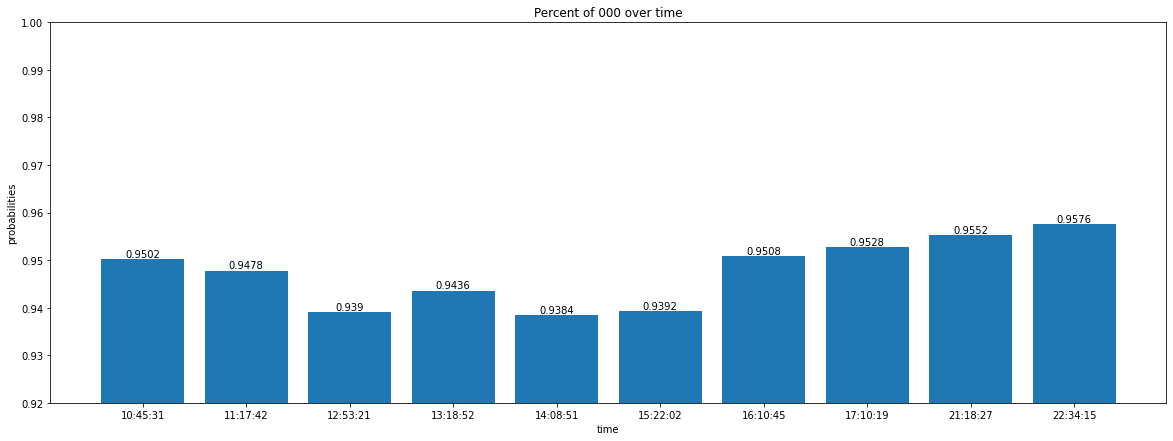

In [14]:
zerozerozerolist = []
zerozeroonelist = []
zeroonezerolist = []
zerooneonelist = []
onezerozerolist = []
onezeroonelist = []
oneonezerolist = []
oneoneonelist = []


for matrix in listofmatrixes: 
    matrix = matrix.transpose()
    zerozerozerolist.append(matrix[0][0])
    zerozeroonelist.append(matrix[1][1])
    zeroonezerolist.append(matrix[2][2])
    zerooneonelist.append(matrix[3][3])
    onezerozerolist.append(matrix[4][4])
    onezeroonelist.append(matrix[5][5])
    oneonezerolist.append(matrix[6][6])
    oneoneonelist.append(matrix[7][7])

#zerozerozerodict = dict(zip(timelist,zerozerozerolist))
#zerozeroonedict = dict(zip(timelist,zerozeroonelist))
#zeroonezerodict = dict(zip(timelist,zeroonezerolist))
#zerooneonedict = dict(zip(timelist,zerooneonelist))
#onezerozerodict = dict(zip(timelist,onezerozerolist))
#onezeroonedict = dict(zip(timelist,onezeroonelist))
#oneonezerodict = dict(zip(timelist,oneonezerolist))
#oneoneonedict = dict(zip(timelist,oneoneonelist))

plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 000 over time")
for i in range(len(zerozerozerolist)):
    plt.annotate(str(zerozerozerolist[i]), xy=(timelist[i],zerozerozerolist[i]), ha='center', va='bottom')
plt.bar(timelist,zerozerozerolist)
plt.ylim([0.92, 1])
plt.show()

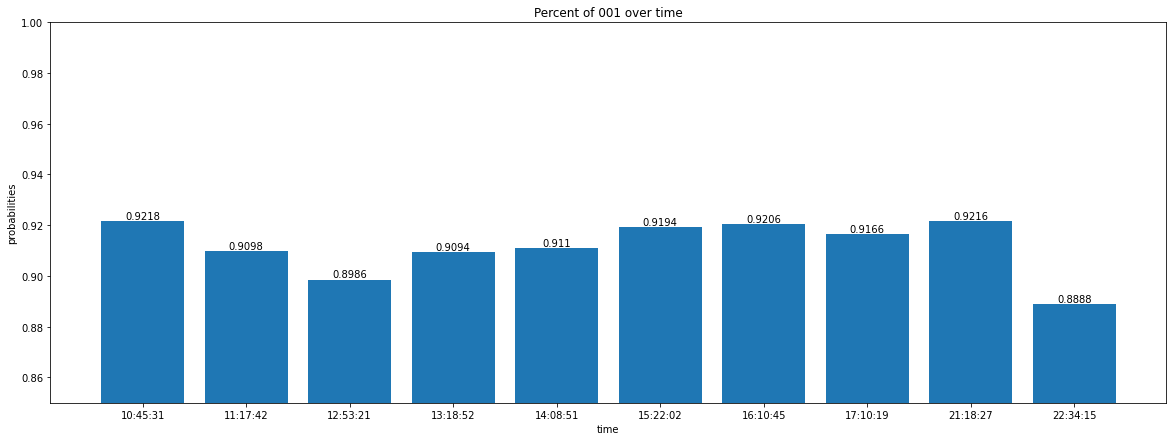

In [15]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 001 over time")
for i in range(len(zerozeroonelist)):
    plt.annotate(str(zerozeroonelist[i]), xy=(timelist[i],zerozeroonelist[i]), ha='center', va='bottom')
plt.bar(timelist,zerozeroonelist)
plt.ylim([0.85, 1])
plt.show()

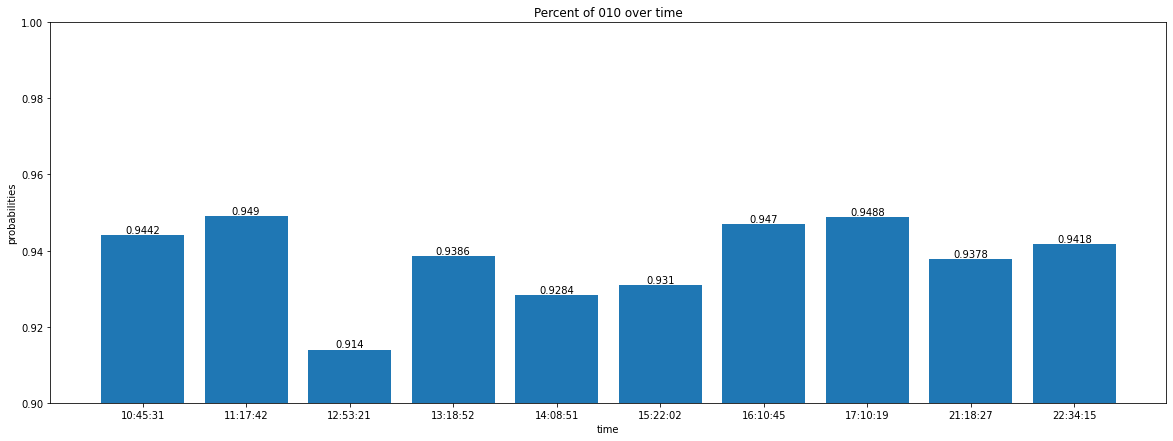

In [16]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 010 over time")
for i in range(len(zeroonezerolist)):
    plt.annotate(str(zeroonezerolist[i]), xy=(timelist[i],zeroonezerolist[i]), ha='center', va='bottom')
plt.bar(timelist,zeroonezerolist)
plt.ylim([0.9, 1])
plt.show()

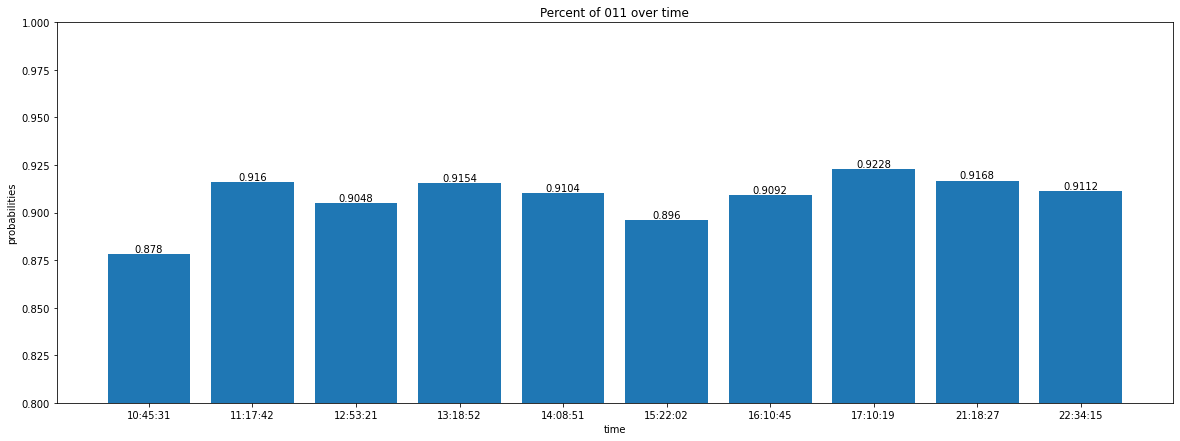

In [17]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 011 over time")
for i in range(len(zerooneonelist)):
    plt.annotate(str(zerooneonelist[i]), xy=(timelist[i],zerooneonelist[i]), ha='center', va='bottom')
plt.bar(timelist,zerooneonelist)
plt.ylim([0.80, 1])
plt.show()

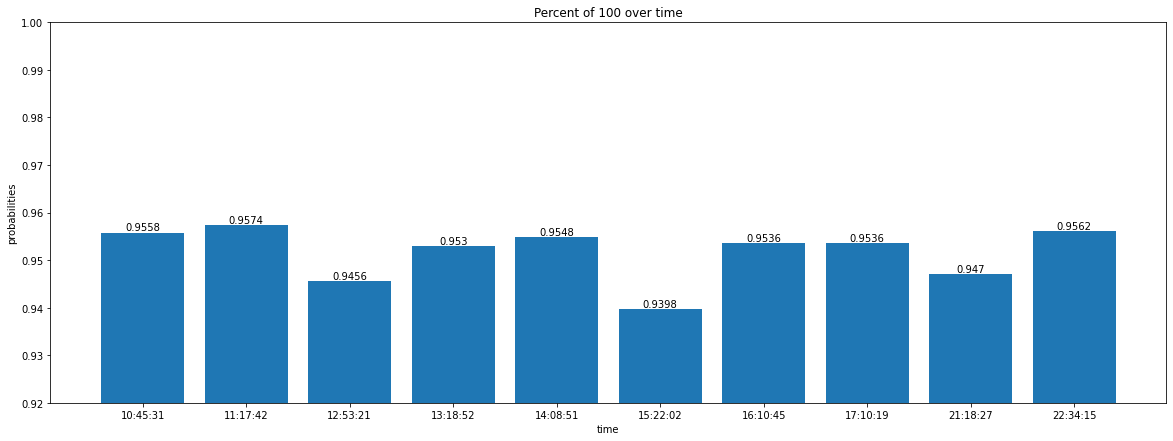

In [18]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 100 over time")
for i in range(len(onezerozerolist)):
    plt.annotate(str(onezerozerolist[i]), xy=(timelist[i],onezerozerolist[i]), ha='center', va='bottom')
plt.bar(timelist,onezerozerolist)
plt.ylim([0.92, 1])
plt.show()

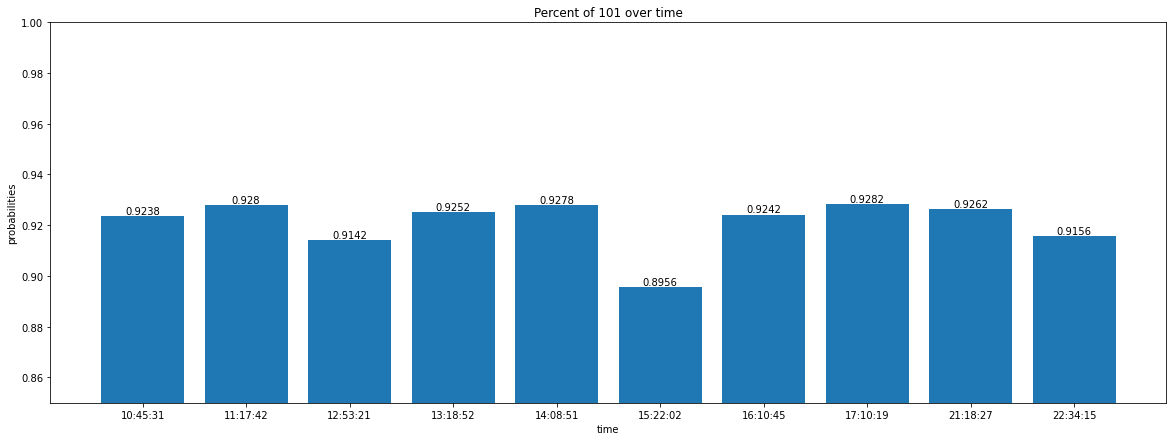

In [19]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 101 over time")
for i in range(len(onezeroonelist)):
    plt.annotate(str(onezeroonelist[i]), xy=(timelist[i],onezeroonelist[i]), ha='center', va='bottom')
plt.bar(timelist,onezeroonelist)
plt.ylim([0.85, 1])
plt.show()

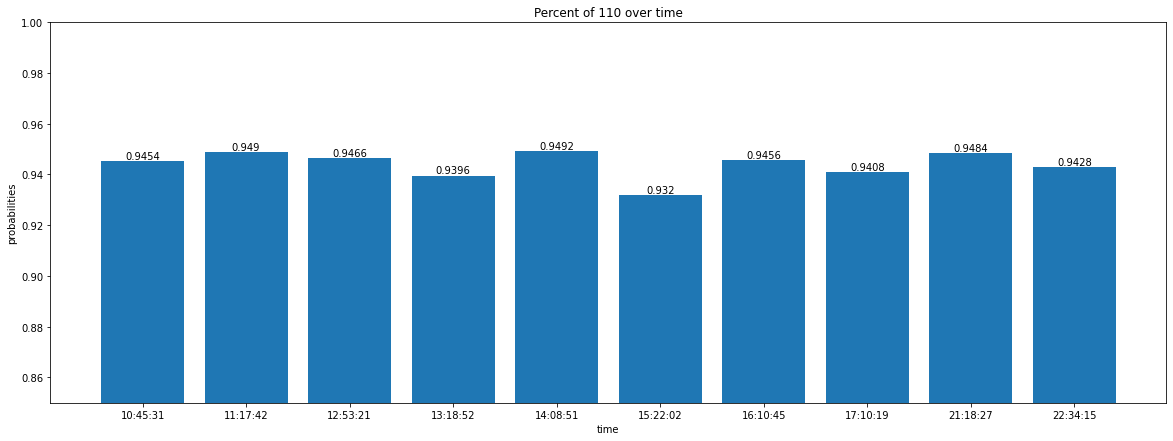

In [20]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 110 over time")
for i in range(len(oneonezerolist)):
    plt.annotate(str(oneonezerolist[i]), xy=(timelist[i],oneonezerolist[i]), ha='center', va='bottom')
plt.bar(timelist,oneonezerolist)
plt.ylim([0.85, 1])
plt.show()

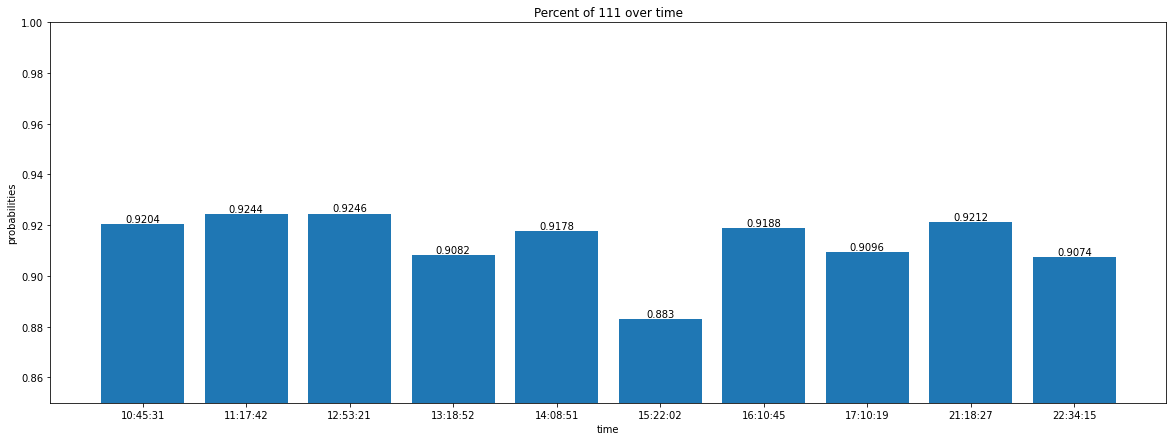

In [21]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 111 over time")
for i in range(len(oneoneonelist)):
    plt.annotate(str(oneoneonelist[i]), xy=(timelist[i],oneoneonelist[i]), ha='center', va='bottom')
plt.bar(timelist,oneoneonelist)
plt.ylim([0.85, 1])
plt.show()

In [36]:
row0=[0, 0, 0, 0, 0, 0, 0, 0]
row1=[0, 0, 0, 0, 0, 0, 0, 0]
row2=[0, 0, 0, 0, 0, 0, 0, 0]
row3=[0, 0, 0, 0, 0, 0, 0, 0]
row4=[0, 0, 0, 0, 0, 0, 0, 0]
row5=[0, 0, 0, 0, 0, 0, 0, 0]
row6=[0, 0, 0, 0, 0, 0, 0, 0]
row7=[0, 0, 0, 0, 0, 0, 0, 0]

for matrix in listofmatrixes:
    matrix = matrix.transpose()
    row0= sum([row0, matrix[0]], axis=0)
    row1= sum([row1, matrix[1]], axis=0)
    row2= sum([row2, matrix[2]], axis=0)
    row3= sum([row3, matrix[3]], axis=0)
    row4= sum([row4, matrix[4]], axis=0)
    row5= sum([row5, matrix[5]], axis=0)
    row6= sum([row6, matrix[6]], axis=0)
    row7= sum([row7, matrix[7]], axis=0)

datapoints= len(listofmatrixes)
row0 = [number/datapoints for number in row0]
row1 = [number/datapoints for number in row1]
row2 = [number/datapoints for number in row2]
row3 = [number/datapoints for number in row3]
row4 = [number/datapoints for number in row4]
row5 = [number/datapoints for number in row5]
row6 = [number/datapoints for number in row6]
row7 = [number/datapoints for number in row7]

averagecalmatrix = [row0,row1,row2,row3,row4,row5,row6,row7]
print("Average calibration matrix:")
array_to_latex(averagecalmatrix)

Average calibration matrix:


<IPython.core.display.Latex object>